In [2]:
import pandas as pd
from collections import Counter
import json

In [6]:
file_path = "../data/news_with_tokenized_keywords2.json"
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)

In [8]:
df

,title,link,date,content,source,quarter,cleaned_content,tokenized_content,keywords,bigrams,trigrams,bigrams_perm,bigrams_sw,bigrams_comb,trigrams_sw,trigrams_perm,trigrams_comb
0,朝鲜试射导弹亚太骤起波澜,https://www.gmw.cn/01gmrb/2006-07/12/content_4...,2006-07-12,7月5日，朝鲜连续发射7枚导弹，引起国际社会震惊。近日，美日在安理会积极推动制裁朝鲜的议案，...,光明网,2006Q3,7月5日朝鲜连续发射7枚导弹引起国际社会震惊。近日美日在安理会积极推动制裁朝鲜的议案并加紧协...,7月 5日 朝鲜 连续 发射 7 枚 导弹 引起 国际 社会 震惊 。 美 日 安理会 积极...,"[[朝鲜, 0.3875], [导弹, 0.3606], [发射, 0.2858], [制裁...","[[朝鲜, 导弹], [导弹, 发射], [发射, 制裁], [制裁, 日本], [日本, ...","[[朝鲜, 导弹, 发射], [导弹, 发射, 制裁], [发射, 制裁, 日本], [制裁...","[[朝鲜, 导弹], [朝鲜, 发射], [朝鲜, 制裁], [朝鲜, 日本], [朝鲜, ...","[[朝鲜, 导弹], [导弹, 发射], [发射, 制裁], [制裁, 日本], [日本, ...","[[朝鲜, 导弹], [朝鲜, 发射], [朝鲜, 制裁], [朝鲜, 日本], [朝鲜, ...","[[朝鲜, 导弹, 发射], [导弹, 发射, 制裁], [发射, 制裁, 日本], [制裁...","[[朝鲜, 导弹, 发射], [朝鲜, 导弹, 制裁], [朝鲜, 导弹, 日本], [朝鲜...","[[朝鲜, 导弹, 发射], [朝鲜, 导弹, 制裁], [朝鲜, 导弹, 日本], [朝鲜..."
1,美朝关系开始解冻,https://www.gmw.cn/01gmrb/2007-03/08/content_5...,2007-03-08,被外界视为“破冰之旅”的朝鲜副外相金桂冠3月5至6日在纽约与美国助理国务卿希尔就两国关系正常...,光明网,2007Q1,被外界视为破冰之旅的朝鲜副外相金桂冠3月5至6日在纽约与美国助理国务卿希尔就两国关系正常化进...,外界 视为 破冰 之 旅 朝鲜 副外相 金桂冠 3月 5 6日 纽约 美国 助理 国务卿 希...,"[[会谈, 0.5007], [朝鲜, 0.2852], [关系, 0.2421], [美元...","[[会谈, 朝鲜], [朝鲜, 关系], [关系, 美元], [美元, 美国], [美国, ...","[[会谈, 朝鲜, 关系], [朝鲜, 关系, 美元], [关系, 美元, 美国], [美元...","[[会谈, 朝鲜], [会谈, 关系], [会谈, 美元], [会谈, 美国], [会谈, ...","[[会谈, 朝鲜], [朝鲜, 关系], [关系, 美元], [美元, 美国], [美国, ...","[[会谈, 朝鲜], [会谈, 关系], [会谈, 美元], [会谈, 美国], [会谈, ...","[[会谈, 朝鲜, 关系], [朝鲜, 关系, 美元], [关系, 美元, 美国], [美元...","[[会谈, 朝鲜, 关系], [会谈, 朝鲜, 美元], [会谈, 朝鲜, 美国], [会谈...","[[会谈, 朝鲜, 关系], [会谈, 朝鲜, 美元], [会谈, 朝鲜, 美国], [会谈..."
2,美日韩间谍云集朝鲜周边空中侦察地面窃听 - 国际经济,http://intl.ce.cn/zj/200809/19/t20080919_16855...,2008-09-19,神秘，这是朝鲜留给外界的印象。 正因为神秘，一些国家的情报机构费尽心机，通过投放卫星、派遣侦...,中国经济网,2008Q3,神秘这是朝鲜留给外界的印象。 正因为神秘一些国家的情报机构费尽心机通过投放卫星派遣侦察机甚至...,神秘 朝鲜 留给 外界 印象 。 正 神秘 国家 情报 费尽心机 投放 卫星 派遣 侦察机 ...,"[[情报, 0.5944], [朝鲜, 0.5479], [侦察, 0.2274], [卫星...","[[情报, 朝鲜], [朝鲜, 侦察], [侦察, 卫星], [卫星, 这些], [这些, ...","[[情报, 朝鲜, 侦察], [朝鲜, 侦察, 卫星], [侦察, 卫星, 这些], [卫星...","[[情报, 朝鲜], [情报, 侦察], [情报, 卫星], [情报, 这些], [情报, ...","[[情报, 朝鲜], [朝鲜, 侦察], [侦察, 卫星], [卫星, 这些], [这些, ...","[[情报, 朝鲜], [情报, 侦察], [情报, 卫星], [情报, 这些], [情报, ...","[[情报, 朝鲜, 侦察], [朝鲜, 侦察, 卫星], [侦察, 卫星, 这些], [卫星...","[[情报, 朝鲜, 侦察], [情报, 朝鲜, 卫星], [情报, 朝鲜, 这些], [情报...","[[情报, 朝鲜, 侦察], [情报, 朝鲜, 卫星], [情报, 朝鲜, 这些], [情报..."
3,美日韩紧盯朝鲜射导弹(图) - 国际经济,http://intl.ce.cn/zj/200902/11/t20090211_18171...,2009-02-11,改进型“大浦洞2号”据说可攻击美本土，甚至可能具有搭载核弹头技术 朝鲜政府最近频繁发出朝韩关...,中国经济网,2009Q1,改进型大浦洞2号据说可攻击美本土甚至可能具有搭载核弹头技术 朝鲜政府最近频繁发出朝韩关系恶化...,改进型 大浦洞 2 据说 攻击 美 本土 甚至 具有 搭载 核 弹头 技术 朝鲜 最近 频繁...,"[[导弹, 0.6383], [朝鲜, 0.4407], [试射, 0.2934], [公里...","[[导弹, 朝鲜], [朝鲜, 试射], [试射, 公里], [公里, 射程], [射程, ...","[[导弹, 朝鲜, 试射], [朝鲜, 试射, 公里], [试射, 公里, 射程], [公里...","[[导弹, 朝鲜], [导弹, 试射], [导弹, 公里], [导弹, 射程], [导弹, ...","[[导弹, 朝鲜], [朝鲜, 试射], [试射, 公里], [公里, 射程], [射程, ...","[[导弹, 朝鲜], [导弹, 试射], [导弹, 公里], [导弹, 射程], [导弹, ...","[[导弹, 朝鲜, 试射], [朝鲜, 试射, 公里], [试射, 公里, 射程], [公里...","[[导弹, 朝鲜, 试射], [导弹, 朝鲜, 公里], [导弹, 朝鲜, 射程], [导弹...","[[导弹, 朝鲜, 试射], [导弹, 朝鲜, 公里], [导弹, 朝鲜, 射程], [导弹..."
4,美国朝鲜问题特使称美愿与朝对话,https://world.huanqiu.com/article/9CaKrnJlEWs,2009-03-07,新华网首尔3月7日电 (记者李拯宇 干玉兰) 美国朝鲜问题特使斯蒂芬·博斯沃思7日在韩国说，...,环球网,2009Q1,新华网首尔3月7日电 记者李拯宇 干玉兰 美国朝鲜问题特使斯蒂芬博斯沃思7日在韩国说美国愿意...,新华网 首尔 3月 7日 电 李拯宇 干玉兰 美国 朝鲜 问题 特使 斯蒂芬博斯沃思 7日 ...,"[[日, 0.6123], [愿意, 0.4147], [朝鲜, 0.3755], [对话,...","[[日, 愿意], [愿意, 朝鲜], [朝鲜, 对话], [对话, 美国], [美国, 接...","[[日, 愿意, 朝鲜], [愿意, 朝鲜, 对话], [朝鲜, 对话, 美国], [对话,...","[[日, 愿意], [日, 朝鲜], [日, 对话], [日, 美国], [日, 接触], ...","[[日, 愿意], [愿意, 朝鲜], [朝鲜, 对话], [对话, 美国], [美国, 接...","[[日, 愿意], [日, 朝鲜], [日, 对话], [日, 美国], [日, 接触], ...","[[日, 愿意, 朝鲜], [愿意, 朝鲜, 对话], [朝鲜, 对话, 美国], [对话,...","[[日, 愿意, 朝鲜], [日, 愿意, 对话], [日, 愿意, 美国], [日, 愿意...","[[日, 愿意, 朝鲜], [日, 愿意, 对话], [日, 愿意, 美国], [日, 愿意..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,詹德斌：韩国政局变动，美国要做的不应是施压,https://hqtime.huanqiu.com/share/article/4Ky1A...,2025-01-07,美国国务卿布林肯1月5日抵达韩国。这看上去似乎是一次礼仪性道别之旅，但防止韩国“后弹劾政局”...,环球网,2025Q1,美国国务卿布林肯1月5日抵达韩国。这看上去似乎是一次礼仪性道别之旅但防止韩国后弹劾政局对美韩...,美国 国务卿

In [17]:
from collections import Counter
import pandas as pd

# 📌 데이터가 올바른 리스트인지 확인하고 변환
df["bigrams_sw"] = df["bigrams_sw"].apply(lambda x: x if isinstance(x, list) else [])
df["trigrams_sw"] = df["trigrams_sw"].apply(lambda x: x if isinstance(x, list) else [])

# 📌 모든 N-gram 리스트 합치기 (빈 값 방지)
all_bigrams_sw = [tuple(bigram) for sublist in df["bigrams_sw"] for bigram in sublist if isinstance(bigram, (list, tuple)) and len(bigram) == 2]
all_trigrams_sw = [tuple(trigram) for sublist in df["trigrams_sw"] for trigram in sublist if isinstance(trigram, (list, tuple)) and len(trigram) == 3]


# 📌 빈도 계산
bigram_counts_sw = Counter(all_bigrams_sw)
trigram_counts_sw = Counter(all_trigrams_sw)

# 📌 빈도 데이터프레임 변환
bigram_sw_df = pd.DataFrame(bigram_counts_sw.items(), columns=["bigram", "count"]).sort_values(by="count", ascending=False)
trigram_sw_df = pd.DataFrame(trigram_counts_sw.items(), columns=["trigram", "count"]).sort_values(by="count", ascending=False)

# 📌 상위 10개 출력
print("📌 가장 많이 등장한 Bigram:")
print(bigram_sw_df.head(10))

print("\n📌 가장 많이 등장한 Trigram:")
print(trigram_sw_df.head(10))


📌 가장 많이 등장한 Bigram:
        bigram  count
161    (朝鲜, 日)     27
356   (韩国, 日本)     23
1606   (韩国, 日)     22
530   (日本, 韩国)     21
56     (日, 朝鲜)     20
513   (韩国, 美国)     19
619     (日, 日)     18
297   (朝鲜, 半岛)     17
934   (日本, 美国)     15
482   (情报, 军事)     14

📌 가장 많이 등장한 Trigram:
           trigram  count
2749  (萨德, 系统, 部署)      6
3135  (协定, 签署, 情报)      5
1763  (协定, 情报, 军事)      5
3172  (情报, 军事, 保护)      5
481   (军事, 保护, 韩国)      5
0     (朝鲜, 导弹, 发射)      4
5508  (达成, 处理, 萨德)      4
5507  (半岛, 达成, 处理)      4
5506  (问题, 半岛, 达成)      4
5505  (共识, 问题, 半岛)      4


In [19]:
from collections import Counter
import pandas as pd

# 📌 데이터가 올바른 리스트인지 확인하고 변환
df["bigrams_comb"] = df["bigrams_comb"].apply(lambda x: x if isinstance(x, list) else [])
df["trigrams_comb"] = df["trigrams_comb"].apply(lambda x: x if isinstance(x, list) else [])

# 📌 모든 N-gram 리스트 합치기 (빈 값 방지)
all_bigrams_comb = [tuple(bigram) for sublist in df["bigrams_comb"] for bigram in sublist if isinstance(bigram, (list, tuple)) and len(bigram) == 2]
all_trigrams_comb = [tuple(trigram) for sublist in df["trigrams_comb"] for trigram in sublist if isinstance(trigram, (list, tuple)) and len(trigram) == 3]


# 📌 빈도 계산
bigram_counts_comb = Counter(all_bigrams_comb)
trigram_counts_comb = Counter(all_trigrams_comb)

# 📌 빈도 데이터프레임 변환
bigram_comb_df = pd.DataFrame(bigram_counts_comb.items(), columns=["bigram", "count"]).sort_values(by="count", ascending=False)
trigram_comb_df = pd.DataFrame(trigram_counts_comb.items(), columns=["trigram", "count"]).sort_values(by="count", ascending=False)

# 📌 상위 10개 출력
print("📌 가장 많이 등장한 Bigram:")
print(bigram_comb_df.head(10))

print("\n📌 가장 많이 등장한 Trigram:")
print(trigram_comb_df.head(10))



📌 가장 많이 등장한 Bigram:
        bigram  count
772    (朝鲜, 日)    123
2070  (韩国, 美国)     83
1054  (韩国, 日本)     79
1056   (韩国, 日)     76
872     (日, 日)     68
56    (朝鲜, 美国)     57
1446  (美国, 中国)     56
826   (日本, 美国)     55
1603   (日, 韩国)     53
104   (朝鲜, 韩国)     51

📌 가장 많이 등장한 Trigram:
            trigram  count
6985   (协定, 情报, 军事)     21
2980   (协定, 军事, 韩国)     21
6987   (协定, 情报, 韩国)     20
4300    (发射, 朝鲜, 日)     18
9115    (朝鲜, 日, 韩国)     18
34567  (萨德, 部署, 韩国)     18
34634  (萨德, 系统, 部署)     18
8608     (朝鲜, 日, 日)     17
34569  (萨德, 部署, 美国)     17
7016   (情报, 军事, 韩国)     17


In [20]:
from collections import Counter
import pandas as pd

# 📌 데이터가 올바른 리스트인지 확인하고 변환
df["bigrams_perm"] = df["bigrams_perm"].apply(lambda x: x if isinstance(x, list) else [])
df["trigrams_perm"] = df["trigrams_perm"].apply(lambda x: x if isinstance(x, list) else [])

# 📌 모든 N-gram 리스트 합치기 (빈 값 방지)
all_bigrams_perm = [tuple(bigram) for sublist in df["bigrams_perm"] for bigram in sublist if isinstance(bigram, (list, tuple)) and len(bigram) == 2]
all_trigrams_perm = [tuple(trigram) for sublist in df["trigrams_perm"] for trigram in sublist if isinstance(trigram, (list, tuple)) and len(trigram) == 3]


# 📌 빈도 계산
bigram_counts_perm = Counter(all_bigrams_perm)
trigram_counts_perm = Counter(all_trigrams_perm)

# 📌 빈도 데이터프레임 변환
bigram_perm_df = pd.DataFrame(bigram_counts_perm.items(), columns=["bigram", "count"]).sort_values(by="count", ascending=False)
trigram_perm_df = pd.DataFrame(trigram_counts_perm.items(), columns=["trigram", "count"]).sort_values(by="count", ascending=False)

# 📌 상위 10개 출력
print("📌 가장 많이 등장한 Bigram:")
print(bigram_perm_df.head(10))

print("\n📌 가장 많이 등장한 Trigram:")
print(trigram_perm_df.head(10))


📌 가장 많이 등장한 Bigram:
        bigram  count
353    (日, 朝鲜)    173
370    (朝鲜, 日)    173
1666    (日, 日)    136
2023  (日本, 韩国)    130
1992  (韩国, 日本)    130
1993   (韩国, 日)    129
2038   (日, 韩国)    129
3466  (美国, 韩国)    120
3511  (韩国, 美国)    120
1278  (美国, 中国)    103

📌 가장 많이 등장한 Trigram:
           trigram  count
4516   (朝鲜, 发射, 日)     56
4321   (发射, 日, 朝鲜)     56
4528   (朝鲜, 日, 发射)     56
4462   (日, 朝鲜, 发射)     56
4328   (发射, 朝鲜, 日)     56
4447   (日, 发射, 朝鲜)     56
48957   (日, 日, 朝鲜)     54
48814   (朝鲜, 日, 日)     54
48939   (日, 朝鲜, 日)     54
29715  (朝鲜, 日, 韩国)     46


### 연도별로 

In [28]:
from collections import Counter
import pandas as pd
import pandas as pd

# 📌 날짜 컬럼이 문자열인 경우, datetime 변환
df["date"] = pd.to_datetime(df["date"], errors="coerce")  # 변환 실패 시 NaT 처리

# 📌 연도 컬럼 생성
df["year"] = df["date"].dt.year

df["input_year"] = df["year"].apply(lambda x: "2006-2009" if 2006 <= x <= 2009 else str(x))


# 📌 연도별 빈도 분석 함수
def get_ngram_counts_by_year(df, ngram_col, year_col):
    # ✅ 연도를 그룹별로 N-gram 빈도를 계산
    yearly_counts = {}

    for year, group in df.groupby(year_col):
        # ✅ 리스트 펼치기
        all_ngrams = [tuple(ngram) for sublist in group[ngram_col] for ngram in sublist if isinstance(ngram, (list, tuple))]

        # ✅ 빈도 계산
        ngram_counts = Counter(all_ngrams)

        # ✅ DataFrame 변환 (연도별로 저장)
        ngram_df = pd.DataFrame(ngram_counts.items(), columns=[ngram_col, "count"]).sort_values(by="count", ascending=False)
        yearly_counts[year] = ngram_df  # 연도별로 저장

    return yearly_counts  # 딕셔너리 형태로 반환

# 📌 연도별 N-gram 빈도 계산
bigram_counts_by_year = get_ngram_counts_by_year(df, "bigrams_comb", "input_year")
trigram_counts_by_year = get_ngram_counts_by_year(df, "trigrams_comb", "input_year")

# 📌 특정 연도 (예: 2023년)의 가장 많이 등장한 N-gram 확인
year_to_check = "2006-2009"  # 원하는 연도 입력

print(f"\n📌 {year_to_check}년 가장 많이 등장한 Bigram:")
print(bigram_counts_by_year.get(year_to_check, "해당 연도의 데이터 없음").head(10))

print(f"\n📌 {year_to_check}년 가장 많이 등장한 Trigram:")
print(trigram_counts_by_year.get(year_to_check, "해당 연도의 데이터 없음").head(10))



📌 2006-2009년 가장 많이 등장한 Bigram:
    bigrams_comb  count
1       (朝鲜, 发射)      4
100     (朝鲜, 卫星)      3
232     (发射, 朝鲜)      3
9       (导弹, 发射)      3
178      (日, 朝鲜)      2
58      (朝鲜, 问题)      2
104     (朝鲜, 韩国)      2
323     (主席, 发射)      2
18      (发射, 日本)      2
56      (朝鲜, 美国)      2

📌 2006-2009년 가장 많이 등장한 Trigram:
        trigrams_comb  count
651      (发射, 朝鲜, 报道)      2
37       (导弹, 发射, 日本)      2
491        (日, 朝鲜, 月)      2
849     (安理会, 主席, 发射)      2
855     (安理会, 朝鲜, 发射)      2
0        (朝鲜, 导弹, 发射)      1
1115  (澳大利亚, 白皮书, 资源)      1
1123   (澳大利亚, 北京, 感到)      1
1122   (澳大利亚, 北京, 崛起)      1
1121   (澳大利亚, 北京, 资源)      1


In [33]:
from collections import Counter
import pandas as pd

# 📌 연도(Year)만 추출
df["year"] = df["quarter"].str[:4].astype(int)  # "2006Q3" → 2006

# 📌 2006~2009년 데이터를 "2006-2009Q"로 그룹화, 나머지는 기존 쿼터 유지
df["input_quarter"] = df["quarter"].apply(lambda x: "2006-2009Q" if int(x[:4]) in range(2006, 2010) else x)


# 📌 연도별 빈도 분석 함수
def get_ngram_counts_by_year(df, ngram_col, year_col):
    # ✅ 연도를 그룹별로 N-gram 빈도를 계산
    yearly_counts = {}

    for year, group in df.groupby(year_col):
        # ✅ 리스트 펼치기
        all_ngrams = [tuple(ngram) for sublist in group[ngram_col] for ngram in sublist if isinstance(ngram, (list, tuple))]

        # ✅ 빈도 계산
        ngram_counts = Counter(all_ngrams)

        # ✅ DataFrame 변환 (연도별로 저장)
        ngram_df = pd.DataFrame(ngram_counts.items(), columns=[ngram_col, "count"]).sort_values(by="count", ascending=False)
        yearly_counts[year] = ngram_df  # 연도별로 저장

    return yearly_counts  # 딕셔너리 형태로 반환

# 📌 연도별 N-gram 빈도 계산
bigram_counts_by_year = get_ngram_counts_by_year(df, "bigrams_comb", "input_quarter")
trigram_counts_by_year = get_ngram_counts_by_year(df, "trigrams_comb", "input_quarter")

# 📌 특정 연도 (예: 2023년)의 가장 많이 등장한 N-gram 확인
year_to_check = "2023Q2"  # 원하는 연도 입력

print(f"\n📌 {year_to_check}분기 가장 많이 등장한 Bigram:")
print(bigram_counts_by_year.get(year_to_check, "해당 연도의 데이터 없음").head(10))

print(f"\n📌 {year_to_check}분기 가장 많이 등장한 Trigram:")
print(trigram_counts_by_year.get(year_to_check, "해당 연도의 데이터 없음").head(10))



📌 2023Q2분기 가장 많이 등장한 Bigram:
    bigrams_comb  count
346    (尹锡悦, 韩国)     12
348    (尹锡悦, 关系)      7
347    (尹锡悦, 美国)      7
622    (尹锡悦, 日本)      7
355     (韩国, 美国)      6
520    (尹锡悦, 战略)      5
430    (尹锡悦, 宣言)      5
516     (韩国, 战略)      5
562     (半岛, 冷战)      5
843     (达成, 是否)      4

📌 2023Q2분기 가장 많이 등장한 Trigram:
      trigrams_comb  count
2411  (汪文斌, 半岛, 处理)      4
2462   (问题, 半岛, 冷战)      4
2473   (问题, 处理, 机制)      4
2472   (问题, 处理, 是否)      4
2471   (问题, 处理, 冷战)      4
2470   (问题, 处理, 萨德)      4
2469   (问题, 达成, 机制)      4
2468   (问题, 达成, 是否)      4
2467   (问题, 达成, 冷战)      4
2466   (问题, 达成, 萨德)      4


/Users/gangjisu/IdeaProjects/sentiZh/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gangjisu/IdeaProjects/sentiZh/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gangjisu/IdeaProjects/sentiZh/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gangjisu/IdeaProjects/sentiZh/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gangjisu/IdeaProjects/sentiZh/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWar

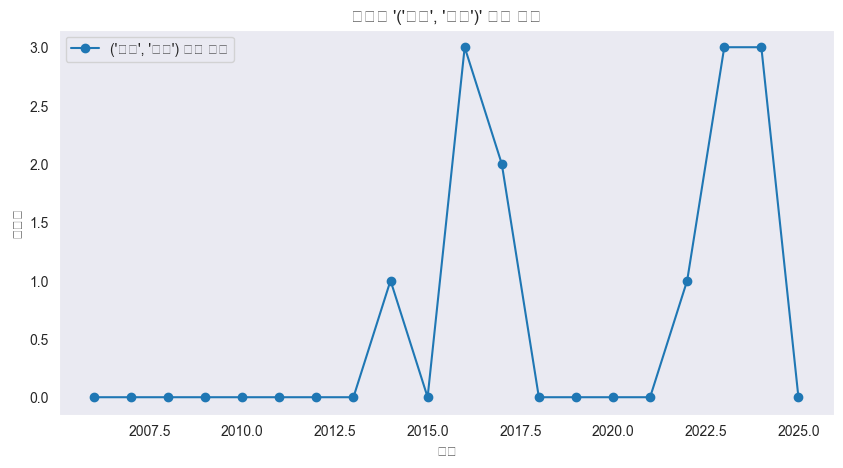

/Users/gangjisu/IdeaProjects/sentiZh/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21457 (\N{CJK UNIFIED IDEOGRAPH-53D1}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gangjisu/IdeaProjects/sentiZh/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23637 (\N{CJK UNIFIED IDEOGRAPH-5C55}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


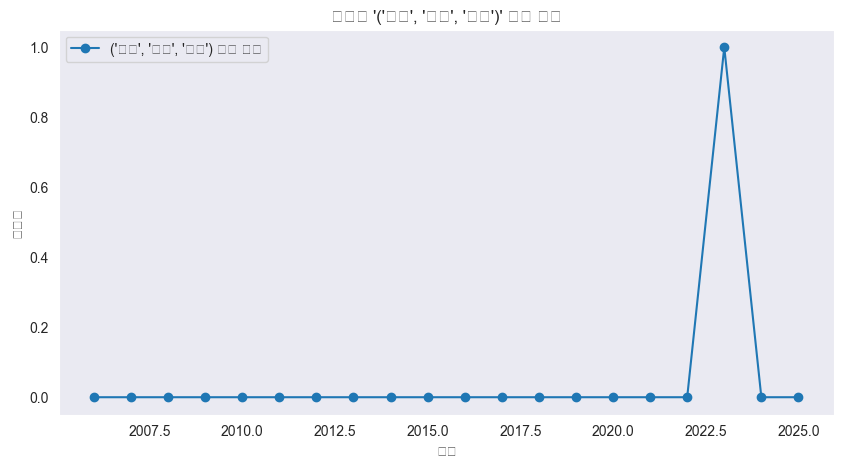

In [23]:
import matplotlib.pyplot as plt

# 📌 특정 N-gram의 연도별 빈도수 변화 추적
def plot_ngram_trend(ngram_counts_by_year, target_ngram, ngram_label):
    trend_data = []

    for year, df in ngram_counts_by_year.items():
        count = df[df[ngram_label] == target_ngram]["count"].values
        trend_data.append((year, count[0] if len(count) > 0 else 0))

    trend_data = sorted(trend_data, key=lambda x: x[0])

    years, counts = zip(*trend_data) if trend_data else ([], [])
    plt.figure(figsize=(10, 5))
    plt.plot(years, counts, marker="o", linestyle="-", label=f"{target_ngram} 등장 횟수")
    plt.xlabel("연도")
    plt.ylabel("빈도수")
    plt.title(f"연도별 '{target_ngram}' 등장 빈도")
    plt.legend()
    plt.grid()
    plt.show()

target_bigram = ("中国", "经济")  # 원하는 Bigram 입력
plot_ngram_trend(bigram_counts_by_year, target_bigram, "bigrams_comb")

target_trigram = ("中国", "经济", "发展")  # 원하는 Trigram 입력
plot_ngram_trend(trigram_counts_by_year, target_trigram, "trigrams_comb")


In [31]:
df

,title,link,date,content,source,quarter,cleaned_content,tokenized_content,keywords,bigrams,...,bigrams_perm,bigrams_sw,bigrams_comb,trigrams_sw,trigrams_perm,trigrams_comb,year,year_grouped,input_year,input_quarter
0,朝鲜试射导弹亚太骤起波澜,https://www.gmw.cn/01gmrb/2006-07/12/content_4...,2006-07-12,7月5日，朝鲜连续发射7枚导弹，引起国际社会震惊。近日，美日在安理会积极推动制裁朝鲜的议案，...,光明网,2006Q3,7月5日朝鲜连续发射7枚导弹引起国际社会震惊。近日美日在安理会积极推动制裁朝鲜的议案并加紧协...,7月 5日 朝鲜 连续 发射 7 枚 导弹 引起 国际 社会 震惊 。 美 日 安理会 积极...,"[[朝鲜, 0.3875], [导弹, 0.3606], [发射, 0.2858], [制裁...","[[朝鲜, 导弹], [导弹, 发射], [发射, 制裁], [制裁, 日本], [日本, ...",...,"[[朝鲜, 导弹], [朝鲜, 发射], [朝鲜, 制裁], [朝鲜, 日本], [朝鲜, ...","[[朝鲜, 导弹], [导弹, 发射], [发射, 制裁], [制裁, 日本], [日本, ...","[[朝鲜, 导弹], [朝鲜, 发射], [朝鲜, 制裁], [朝鲜, 日本], [朝鲜, ...","[[朝鲜, 导弹, 发射], [导弹, 发射, 制裁], [发射, 制裁, 日本], [制裁...","[[朝鲜, 导弹, 发射], [朝鲜, 导弹, 制裁], [朝鲜, 导弹, 日本], [朝鲜...","[[朝鲜, 导弹, 发射], [朝鲜, 导弹, 制裁], [朝鲜, 导弹, 日本], [朝鲜...",2006,2006-2009,2006-2009,2006-2009Q
1,美朝关系开始解冻,https://www.gmw.cn/01gmrb/2007-03/08/content_5...,2007-03-08,被外界视为“破冰之旅”的朝鲜副外相金桂冠3月5至6日在纽约与美国助理国务卿希尔就两国关系正常...,光明网,2007Q1,被外界视为破冰之旅的朝鲜副外相金桂冠3月5至6日在纽约与美国助理国务卿希尔就两国关系正常化进...,外界 视为 破冰 之 旅 朝鲜 副外相 金桂冠 3月 5 6日 纽约 美国 助理 国务卿 希...,"[[会谈, 0.5007], [朝鲜, 0.2852], [关系, 0.2421], [美元...","[[会谈, 朝鲜], [朝鲜, 关系], [关系, 美元], [美元, 美国], [美国, ...",...,"[[会谈, 朝鲜], [会谈, 关系], [会谈, 美元], [会谈, 美国], [会谈, ...","[[会谈, 朝鲜], [朝鲜, 关系], [关系, 美元], [美元, 美国], [美国, ...","[[会谈, 朝鲜], [会谈, 关系], [会谈, 美元], [会谈, 美国], [会谈, ...","[[会谈, 朝鲜, 关系], [朝鲜, 关系, 美元], [关系, 美元, 美国], [美元...","[[会谈, 朝鲜, 关系], [会谈, 朝鲜, 美元], [会谈, 朝鲜, 美国], [会谈...","[[会谈, 朝鲜, 关系], [会谈, 朝鲜, 美元], [会谈, 朝鲜, 美国], [会谈...",2007,2006-2009,2006-2009,2006-2009Q
2,美日韩间谍云集朝鲜周边空中侦察地面窃听 - 国际经济,http://intl.ce.cn/zj/200809/19/t20080919_16855...,2008-09-19,神秘，这是朝鲜留给外界的印象。 正因为神秘，一些国家的情报机构费尽心机，通过投放卫星、派遣侦...,中国经济网,2008Q3,神秘这是朝鲜留给外界的印象。 正因为神秘一些国家的情报机构费尽心机通过投放卫星派遣侦察机甚至...,神秘 朝鲜 留给 外界 印象 。 正 神秘 国家 情报 费尽心机 投放 卫星 派遣 侦察机 ...,"[[情报, 0.5944], [朝鲜, 0.5479], [侦察, 0.2274], [卫星...","[[情报, 朝鲜], [朝鲜, 侦察], [侦察, 卫星], [卫星, 这些], [这些, ...",...,"[[情报, 朝鲜], [情报, 侦察], [情报, 卫星], [情报, 这些], [情报, ...","[[情报, 朝鲜], [朝鲜, 侦察], [侦察, 卫星], [卫星, 这些], [这些, ...","[[情报, 朝鲜], [情报, 侦察], [情报, 卫星], [情报, 这些], [情报, ...","[[情报, 朝鲜, 侦察], [朝鲜, 侦察, 卫星], [侦察, 卫星, 这些], [卫星...","[[情报, 朝鲜, 侦察], [情报, 朝鲜, 卫星], [情报, 朝鲜, 这些], [情报...","[[情报, 朝鲜, 侦察], [情报, 朝鲜, 卫星], [情报, 朝鲜, 这些], [情报...",2008,2006-2009,2006-2009,2006-2009Q
3,美日韩紧盯朝鲜射导弹(图) - 国际经济,http://intl.ce.cn/zj/200902/11/t20090211_18171...,2009-02-11,改进型“大浦洞2号”据说可攻击美本土，甚至可能具有搭载核弹头技术 朝鲜政府最近频繁发出朝韩关...,中国经济网,2009Q1,改进型大浦洞2号据说可攻击美本土甚至可能具有搭载核弹头技术 朝鲜政府最近频繁发出朝韩关系恶化...,改进型 大浦洞 2 据说 攻击 美 本土 甚至 具有 搭载 核 弹头 技术 朝鲜 最近 频繁...,"[[导弹, 0.6383], [朝鲜, 0.4407], [试射, 0.2934], [公里...","[[导弹, 朝鲜], [朝鲜, 试射], [试射, 公里], [公里, 射程], [射程, ...",...,"[[导弹, 朝鲜], [导弹, 试射], [导弹, 公里], [导弹, 射程], [导弹, ...","[[导弹, 朝鲜], [朝鲜, 试射], [试射, 公里], [公里, 射程], [射程, ...","[[导弹, 朝鲜], [导弹, 试射], [导弹, 公里], [导弹, 射程], [导弹, ...","[[导弹, 朝鲜, 试射], [朝鲜, 试射, 公里], [试射, 公里, 射程], [公里...","[[导弹, 朝鲜, 试射], [导弹, 朝鲜, 公里], [导弹, 朝鲜, 射程], [导弹...","[[导弹, 朝鲜, 试射], [导弹, 朝鲜, 公里], [导弹, 朝鲜, 射程], [导弹...",2009,2006-2009,2006-2009,2006-2009Q
4,美国朝鲜问题特使称美愿与朝对话,https://world.huanqiu.com/article/9CaKrnJlEWs,2009-03-07,新华网首尔3月7日电 (记者李拯宇 干玉兰) 美国朝鲜问题特使斯蒂芬·博斯沃思7日在韩国说，...,环球网,2009Q1,新华网首尔3月7日电 记者李拯宇 干玉兰 美国朝鲜问题特使斯蒂芬博斯沃思7日在韩国说美国愿意...,新华网 首尔 3月 7日 电 李拯宇 干玉兰 美国 朝鲜 问题 特使 斯蒂芬博斯沃思 7日 ...,"[[日, 0.6123], [愿意, 0.4147], [朝鲜, 0.3755], [对话,...","[[日, 愿意], [愿意, 朝鲜], [朝鲜, 对话], [对话, 美国], [美国, 接...",...,"[[日, 愿意], [日, 朝鲜], [日, 对话], [日, 美国], [日, 接触], ...","[[日, 愿意], [愿意, 朝鲜], [朝鲜, 对话], [对话, 美国], [美国, 接...","[[日, 愿意], [日, 朝鲜], [日, 对话], [日, 美国], [日, 接触], ...","[[日, 愿意, 朝鲜], [愿意, 朝鲜, 对话], [朝鲜, 对话, 美国], [对话,...","[[日, 愿意, 朝鲜], [日, 愿意, 对话], [日, 愿意, 美国], [日, 愿意...","[[日, 愿意, 朝鲜], [日, 愿意, 对话], [日, 愿意, 美国], [日, 愿意...",2009,2006-2009,2006-2009,2006-2009Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,詹德斌：韩国政局变动，美国要做的不应是施压,https://hqtime.huanqiu.com/share/article/4Ky1A...,2025-01-07,美国国务卿布林肯1月5日抵达韩国。这看上去似乎是一次礼仪性道别之旅，但防止韩国“后弹劾政局”...,环球网,2025Q1,美国国务卿布林肯1月5日抵达韩国。这看上去似乎是一次礼仪性道别之旅但防止韩国后弹劾政局对美韩...,美国 国务卿 布林肯 1

In [36]:
from collections import Counter
import pandas as pd

# 📌 연도(Year)만 추출
df["year"] = df["quarter"].str[:4].astype(int)  # "2006Q3" → 2006

# 📌 2006~2009년 데이터를 "2006-2009Q"로 그룹화, 나머지는 기존 분기(YYYYQ#) 유지
df["input_quarter"] = df["quarter"].apply(lambda x: "2006-2009Q" if int(x[:4]) in range(2006, 2010) else x)

# 📌 연도별 빈도 분석 함수
def get_ngram_counts_by_year(df, ngram_col, year_col):
    yearly_counts = {}

    for year, group in df.groupby(year_col):  # ✅ 각 분기(YYYYQ#) 및 "2006-2009Q" 그룹별 계산
        all_ngrams = [tuple(ngram) for sublist in group[ngram_col] for ngram in sublist if isinstance(ngram, (list, tuple))]
        ngram_counts = Counter(all_ngrams)
        ngram_df = pd.DataFrame(ngram_counts.items(), columns=[ngram_col, "count"]).sort_values(by="count", ascending=False)
        yearly_counts[year] = ngram_df  # 분기별 저장

    return yearly_counts  # 딕셔너리 반환

# 📌 모든 분기에 대해 N-gram 빈도 계산
bigram_counts_by_year = get_ngram_counts_by_year(df, "bigrams_comb", "input_quarter")
trigram_counts_by_year = get_ngram_counts_by_year(df, "trigrams_comb", "input_quarter")

# 📌 모든 분기에 대해 자동 출력
for quarter in sorted(bigram_counts_by_year.keys()):  # 분기 정렬 후 출력
    print(f"\n📌 {quarter} 가장 많이 등장한 Bigram:")
    print(bigram_counts_by_year[quarter].head(10))

    print(f"\n📌 {quarter} 가장 많이 등장한 Trigram:")
    print(trigram_counts_by_year[quarter].head(10))



📌 2006-2009Q 가장 많이 등장한 Bigram:
    bigrams_comb  count
1       (朝鲜, 发射)      4
100     (朝鲜, 卫星)      3
232     (发射, 朝鲜)      3
9       (导弹, 发射)      3
178      (日, 朝鲜)      2
58      (朝鲜, 问题)      2
104     (朝鲜, 韩国)      2
323     (主席, 发射)      2
18      (发射, 日本)      2
56      (朝鲜, 美国)      2

📌 2006-2009Q 가장 많이 등장한 Trigram:
        trigrams_comb  count
651      (发射, 朝鲜, 报道)      2
37       (导弹, 发射, 日本)      2
491        (日, 朝鲜, 月)      2
849     (安理会, 主席, 发射)      2
855     (安理会, 朝鲜, 发射)      2
0        (朝鲜, 导弹, 发射)      1
1115  (澳大利亚, 白皮书, 资源)      1
1123   (澳大利亚, 北京, 感到)      1
1122   (澳大利亚, 北京, 崛起)      1
1121   (澳大利亚, 北京, 资源)      1

📌 2010Q1 가장 많이 등장한 Bigram:
   bigrams_comb  count
0      (演习, 参加)      1
23     (联合, 韩国)      1
25     (军演, 军事)      1
26     (军演, 机会)      1
27     (军演, 美军)      1
28     (军演, 军队)      1
29     (军演, 韩国)      1
30     (海外, 军事)      1
31     (海外, 机会)      1
32     (海外, 美军)      1

📌 2010Q1 가장 많이 등장한 Trigram:
   trigrams_comb  count
0   (演习, 参加, 联合)  

In [37]:
# 📌 Bigram & Trigram 데이터를 하나의 CSV 파일로 통합 저장
def save_ngram_to_single_csv(ngram_counts_by_year, filename):
    merged_df = pd.concat([df.assign(quarter=quarter) for quarter, df in ngram_counts_by_year.items()])
    merged_df.to_csv(filename, index=False, encoding="utf-8-sig")
    print(f"✅ 통합 저장 완료: {filename}")

# 📌 Bigram 전체 저장
save_ngram_to_single_csv(bigram_counts_by_year, "bigram_all_quarters1.csv")

# 📌 Trigram 전체 저장
save_ngram_to_single_csv(trigram_counts_by_year, "trigram_all_quarters1.csv")


✅ 통합 저장 완료: bigram_all_quarters1.csv
✅ 통합 저장 완료: trigram_all_quarters1.csv


NameError: name 'ngram_counts_by_year' is not defined